<a href="https://colab.research.google.com/github/PolinaBaranova/MNIST/blob/main/1_4_Dataset_MNIST_and_my_number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подготовка данных

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

from google.colab import files

In [6]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

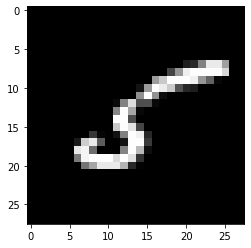


Правильный ответ:  5


In [8]:
n = 11
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB'))
plt.show()
print()
print('Правильный ответ: ', y_train_org[n])

In [9]:
#Меняем формат входных картинок
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print('Формат НАЧАЛЬНЫХ входных тренировочных данных: ', x_train_org.shape)
print('Формат ИЗМЕНЕННЫХ входных тренировочных данных:', x_train.shape)
print()
print('Формат НАЧАЛЬНЫХ входных тестовых данных: ', x_test_org.shape)
print('Формат ИЗМЕНЕННЫХ входных тестовых данных:', x_test.shape)

Формат НАЧАЛЬНЫХ входных тренировочных данных:  (60000, 28, 28)
Формат ИЗМЕНЕННЫХ входных тренировочных данных: (60000, 784)

Формат НАЧАЛЬНЫХ входных тестовых данных:  (10000, 28, 28)
Формат ИЗМЕНЕННЫХ входных тестовых данных: (10000, 784)


In [10]:
#Нормализуем входные картинки
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255

In [11]:
#Меняем формат исходных данных
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

## Создание нейронной сети

In [12]:
model = Sequential()
model.add(Dense(800, input_dim = 784, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## Обучение нейронной сети

In [15]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 8s 16ms/step - loss: 0.3827 - accuracy: 0.8865
Epoch 2/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0778 - accuracy: 0.9761
Epoch 3/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0483 - accuracy: 0.9846
Epoch 4/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0322 - accuracy: 0.9896
Epoch 5/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0246 - accuracy: 0.9923
Epoch 6/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0190 - accuracy: 0.9939
Epoch 7/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0172 - accuracy: 0.9944
Epoch 8/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0140 - accuracy: 0.9957
Epoch 9/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0152 - accuracy: 0.9946
Epoch 10/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0110 - accura

## Распознавание рукописных цифр

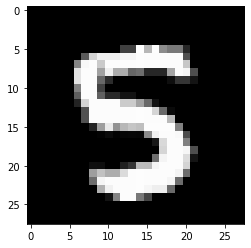

In [14]:
n_rec = 120 #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [ ]:
x = x_test[n_rec]
print(x.shape)

x = np.expand_dims(x, axis=0)
print(x.shape)

prediction = model.predict(x)
print(prediction)

print(sum(prediction[0]))
print()

pred = np.argmax(prediction)
print(pred)
print('Правильный ответ:', y_test_org[n_rec])

(784,)
(1, 784)
[[9.7437446e-25 1.9155445e-22 4.9695390e-26 1.4784776e-10 7.6841819e-26
  1.0000000e+00 2.6754151e-22 4.2428679e-24 1.6135025e-18 2.3637181e-10]]
1.0000000003842195

5
Правильный ответ: 5


## Распознавание рукописной цифры ДЗ


In [ ]:
files.upload()
!ls

Saving HA_Ultra-Pro-3_cut.jpg to HA_Ultra-Pro-3_cut (1).jpg
 HA_Pro_Pics-8.png	       HA_Ultra-Pro-3_cut.jpg
'HA_Ultra-Pro-2_cut (1).jpg'   HA_Ultra-Pro-3.jpg
 HA_Ultra-Pro-2_cut.jpg        HA_Ultra-Pro-5_cut.jpg
'HA_Ultra-Pro-3_cut (1).jpg'   sample_data


In [ ]:
import os
!ls
os.getcwd()

 HA_Pro_Pics-8.png	       HA_Ultra-Pro-3_cut.jpg
'HA_Ultra-Pro-2_cut (1).jpg'   HA_Ultra-Pro-3.jpg
 HA_Ultra-Pro-2_cut.jpg        HA_Ultra-Pro-5_cut.jpg
'HA_Ultra-Pro-3_cut (1).jpg'   sample_data


'/content'

In [ ]:
my_pic = image.load_img(path='/content/HA_Ultra-Pro-3_cut.jpg', target_size=(28, 28), color_mode = 'grayscale')

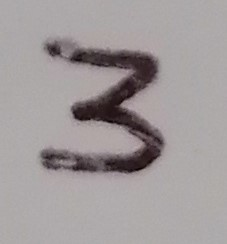

In [ ]:
from IPython.display import Image
Image('HA_Ultra-Pro-3_cut.jpg')

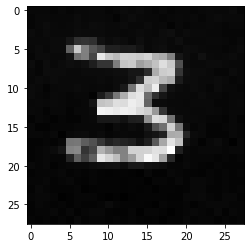

In [ ]:
my_pic_arr = np.array(1 - np.array(my_pic)/ 255)
plt.imshow(my_pic_arr, cmap = 'gray')

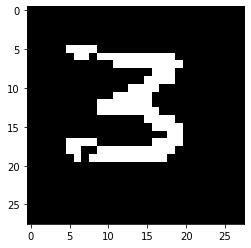


Число на изображении: 3


In [ ]:
my_pic_arr[my_pic_arr < 0.5] = 0
my_pic_arr[my_pic_arr >= 0.5] = 1
plt.imshow(my_pic_arr, cmap = 'gray')
plt.show()
answer = np.argmax(model.predict(my_pic_arr.reshape(1, 784)))
print()
print("Число на изображении:", answer)